# Model comparison pipeline

- Pipeline components:
    - normalisation + scaling
    - imputation
    - ML model

- Took care that `random seeds` are fixed, so models get compared with the same split!

In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt 
import seaborn as sns

from modelsClassifier import fit_modelComparison

sns.set_theme(style="whitegrid", palette=None, font_scale=1.2)

# Classification pipeline

In [4]:
datasetTimepoint = "12_hospitalization"
target = "disease_severity"
#### Normally:
# varPath = f"../../results/featureSelection/{datasetTimepoint}/test.txt"
#### Eva:
varPath = f"../../results/featureSelection/eva/publication.txt"
varPath_name = varPath.replace(".", "/").split("/")[-2]
print(f"Output folder:\t{varPath_name}")

''' 
Define paths
'''
resultsPath = f"../../results/prediction/featureSelection/eva/modelComparison/{varPath_name}"
os.makedirs(resultsPath, exist_ok=True)
dataPath = "../../results/preprocessing/cleaned/fixedVars"
dataset = f"{datasetTimepoint}_{target}_cleaned.csv"

Output folder:	publication


In [5]:
''' 
Read data
'''
data = pd.read_csv(f"{dataPath}/{dataset}", index_col=0)
X = data.drop(target, axis=1)
y = data[target]

''' 
Read in variables
'''
sel_variables = pd.read_csv(varPath, header=None)[0].tolist()
print(sel_variables)

''' 
Run pipeline

--model: RandomForest, LogReg, KNN, GBoost, MLP

'''
for model in ["RandomForest", "LogReg", "KNN", "GBoost", "MLP"]:
    estimators, score = fit_modelComparison(X, y, target, sel_variables, model=model, randomState=11, outerCV=3)
    ### Save
    score["model"] = np.repeat(model, len(score["fit_time"]))
    pd.DataFrame.from_dict(score).to_csv(f"{resultsPath}/{model}_score.csv", index=None) 

    ### Save feature importances if possible
    if model == "RandomForest":
        columnOrderAfterPreprocessing = estimators[0].best_estimator_["selector"].get_feature_names()
        fi_rf = list(zip(estimators[0].best_estimator_[model].feature_importances_, columnOrderAfterPreprocessing))
        df_fi_rf = pd.DataFrame(fi_rf, columns=["fi", "var"]).sort_values("fi", ascending=False)    
        df_fi_rf.to_csv(f"{resultsPath}/{model}_featureImportance.csv", index=None)

['bmi', 'statins_n/y', 'cholesterol_admission_mmol/L', 'hdl_admission_mmol/L', 'ldl_admission_mmol/L', 'triglycerides_admission_mmol/L', 'total_bilirubin_max', 'ast_max', 'alt_max', 'ggt_max', 'crp___max', 'ferritin_max']

Fitting estimator...


Fitting estimator...


Fitting estimator...


Fitting estimator...


Fitting estimator...



/home/skatz/miniconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/skatz/miniconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/skatz/miniconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/skatz/miniconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged ye

# Comparison of all models

In [12]:
df_scores = pd.DataFrame()

for model in ["RandomForest", "LogReg", "KNN", "GBoost", "MLP"]:
    df = pd.read_csv(f"{resultsPath}/{model}_score.csv")
    df_scores = pd.concat([df_scores, df], axis=0, ignore_index=True)

df_scores

,fit_time,score_time,test_acc,test_b_acc,test_recall,test_precision,test_roc_auc_micro,test_roc_auc_macro,test_f1,test_f1_micro,test_f1_macro,test_f1_weighted,test_fbeta,model
0,12.581087,0.791939,0.854545,0.600000,1.000000,0.849057,0.727778,0.727778,0.918367,0.854545,0.625850,0.811998,0.965665,RandomForest
1,12.190051,0.727454,0.836364,0.550000,1.000000,0.833333,0.720000,0.720000,0.909091,0.836364,0.545455,0.776860,0.961538,RandomForest
2,11.199543,0.989179,0.851852,0.638636,0.977273,0.860000,0.748864,0.748864,0.914894,0.851852,0.671733,0.824834,0.951327,RandomForest
3,16.681571,0.724730,0.818182,0.500000,1.000000,0.818182,0.640000,0.640000,0.900000,0.818182,0.450000,0.736364,0.957447,LogReg
4,16.579228,0.700469,0.818182,0.500000,1.000000,0.818182,0.686667,0.686667,0.900000,0.818182,0.450000,0.736364,0.957447,LogReg
5,15.606235,1.022835,0.814815,0.500000,1.000000,0.814815,0.838636,0.838636,0.897959,0.814815,0.448980,0.731670,0.956522,LogReg
6,16.790786,0.851079,0.763636,0.583333,0.866667,0.847826,0.598889,0.598889,0.857143,0.763636,0.586466,0.758715,0.862832,KNN
7,18.716054,0.982866,0.836364,0.627778,0.955556,0.860000,0.551111,0.551111,0.905263,0.836364,0.652632,0.813397,0.934783,KNN
8,15.516802,1.043235,0.833333,0.665909,0.931818,0.872340,0.711364,0.711364,0.901099,0.833333,0.685844,0.821375,0.919283,KNN
9,97.775928,0.702944,0.854545,0.600000,1.000000,0.849057,0.748889,0.748889,0.918367,0.854545,0.625850,0.811998,0.965665,GBoost


Text(0.5, 1.0, "Eva's variables - publication_admission")

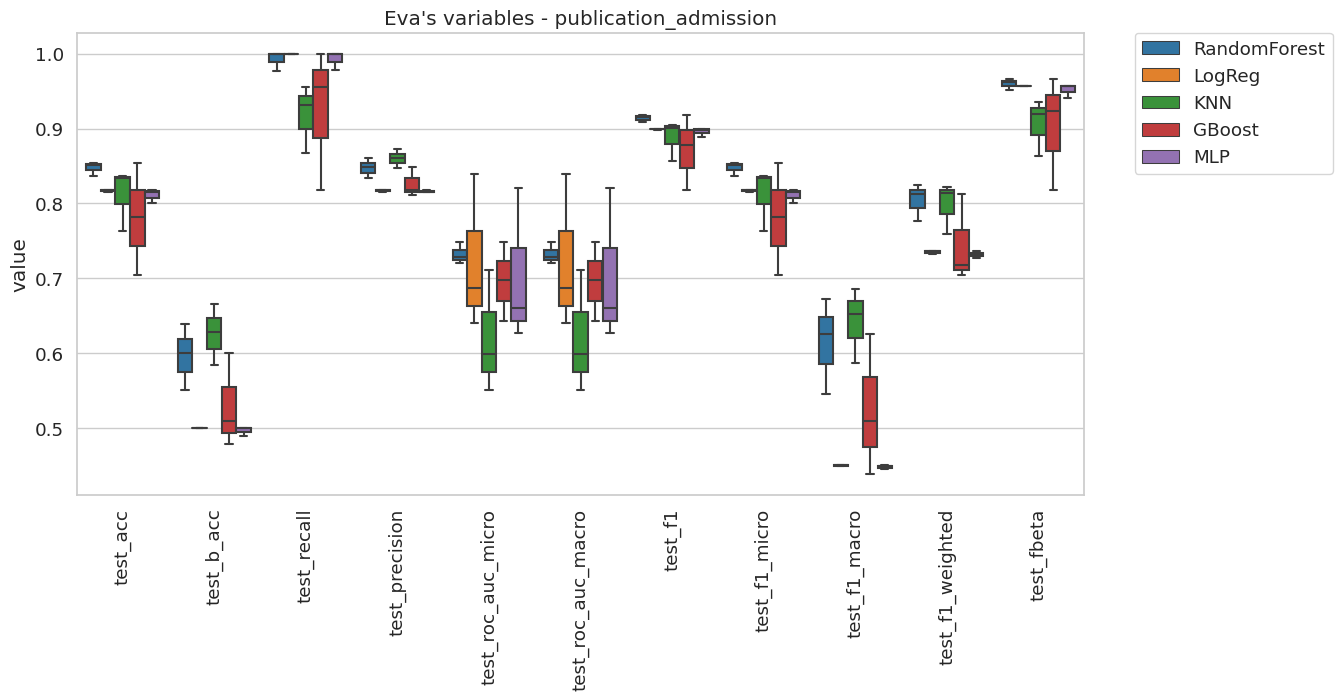

In [13]:
df_plot = df_scores.drop(["fit_time", "score_time"], axis=1)
df_plot = df_plot.melt("model")

fig, ax = plt.subplots(figsize=(13,6))
sns.boxplot(data=df_plot, x="variable", y="value", hue="model")
ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("")
ax.set_title(f"Eva's variables - {varPath_name}")

# Inspect feature importances

## Random Forest

Text(0.5, 1.0, 'MLP')

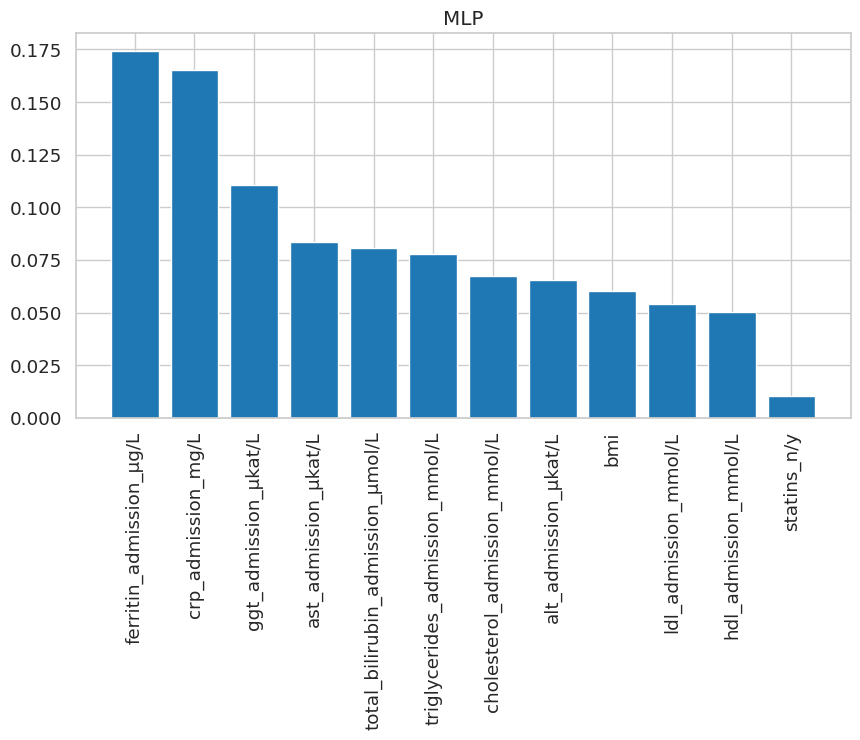

In [14]:
df = pd.read_csv(f"{resultsPath}/RandomForest_featureImportance.csv")

fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df_fi_rf["var"], df_fi_rf["fi"])
ax.tick_params(axis='x', rotation=90)
plt.title(f"{model}")

## Gradient Boosting

In [ ]:
model = "GBoost"
estimators, score = fit_modelComparison(X, y, target, model=model, sel_variables=sel_variables, randomState=11)

fi_gboost = list(zip(estimators[0].best_estimator_[model].feature_importances_, columnOrderAfterPreprocessing))
df_fi_gboost = pd.DataFrame(fi_gboost, columns=["fi", "var"]).sort_values("fi", ascending=False)
df_fi_gboost

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df_fi_gboost.iloc[:10,]["var"], df_fi_gboost.iloc[:10,]["fi"], color="darkred")
ax.tick_params(axis='x', rotation=90)
plt.title(f"{model}: top 10")

## Logistic Regression

In [ ]:
model = "LogReg"
estimators, score = fit_modelComparison(X, y, target, model=model, sel_variables=sel_variables, randomState=11)

fi_logreg = list(zip(estimators[0].best_estimator_[model].coef_[0], columnOrderAfterPreprocessing))
df_fi_logreg = pd.DataFrame(fi_logreg, columns=["fi", "var"]).sort_values("fi", ascending=False)
df_fi_logreg

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df_fi_logreg.iloc[:10]["var"], df_fi_logreg.iloc[:10]["fi"], color="orange")
ax.tick_params(axis='x', rotation=90)
plt.title(f"{model}: top 10")